<a href="https://colab.research.google.com/github/sharibhumayun/Cricket/blob/master/Cats_vs_Dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:04<00:00, 244MB/s]
100% 1.06G/1.06G [00:04<00:00, 265MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [20]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization,Dropout

In [8]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds =  keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
# Normalize
def process(image,label):
  image = tf.cast(image/255, tf.float32)
  return image, label

  train_ds = train_ds.map(process)
  validation_ds = validation_ds.map(process)

In [21]:
# create cnn model

model = Sequential()
model.add(Conv2D(32, kernel_size =(3,3),padding = 'valid', activation ='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2), strides =2, padding ='valid'))

model.add(Conv2D(64, kernel_size =(3,3),padding = 'valid', activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2), strides =2, padding ='valid'))

model.add(Conv2D(128, kernel_size =(3,3),padding = 'valid', activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2), strides =2, padding ='valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation ='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation ='sigmoid'))


In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [23]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [24]:
history = model.fit(train_ds, epochs =10, validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 77s 122ms/step - loss: 1.4106 - accuracy: 0.5552 - val_loss: 0.6737 - val_accuracy: 0.5974
Epoch 2/10
625/625 [==============================] - 76s 121ms/step - loss: 0.6289 - accuracy: 0.6178 - val_loss: 0.5795 - val_accuracy: 0.6918
Epoch 3/10
625/625 [==============================] - 75s 120ms/step - loss: 0.5289 - accuracy: 0.7212 - val_loss: 0.4958 - val_accuracy: 0.7554
Epoch 4/10
625/625 [==============================] - 75s 120ms/step - loss: 0.4516 - accuracy: 0.7724 - val_loss: 0.5139 - val_accuracy: 0.7416
Epoch 5/10
625/625 [==============================] - 76s 120ms/step - loss: 0.4004 - accuracy: 0.8001 - val_loss: 0.6096 - val_accuracy: 0.7166
Epoch 6/10
625/625 [==============================] - 75s 119ms/step - loss: 0.3523 - accuracy: 0.8286 - val_loss: 0.4256 - val_accuracy: 0.8072
Epoch 7/10
625/625 [==============================] - 75s 119ms/step - loss: 0.2974 - accuracy: 0.8550 - val_loss: 1.1090 - val_ac

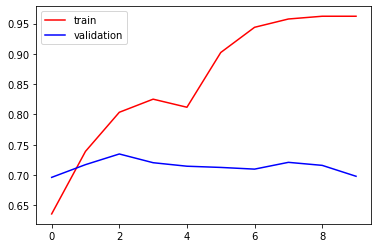

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color ='red', label ='train')
plt.plot(history.history['val_accuracy'], color ='blue', label ='validation')
plt.legend()
plt.show()

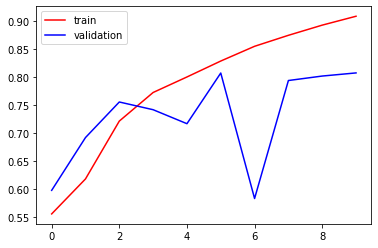

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color ='red', label ='train')
plt.plot(history.history['val_accuracy'], color ='blue', label ='validation')
plt.legend()
plt.show()

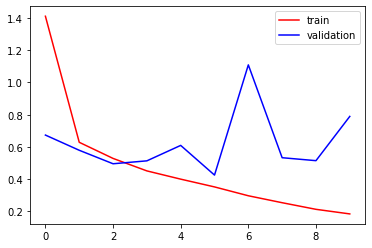

In [26]:
plt.plot(history.history['loss'], color ='red', label ='train')
plt.plot(history.history['val_loss'], color ='blue', label ='validation')
plt.legend()
plt.show()

In [28]:
import cv2

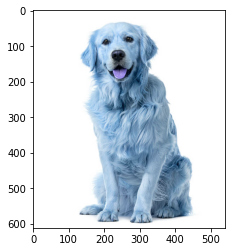

In [29]:
test_img1 = cv2.imread('/content/Dog.jpg')
plt.imshow(test_img1)

In [30]:
test_img1.shape

(612, 541, 3)

In [33]:
test_img1 = cv2.resize(test_img1,(256,256))

In [34]:
test_input1 =test_img1.reshape((1,256,256,3))

In [35]:
model.predict(test_input1)

1/1 [==============================] - 0s 337ms/step


array([[0.98929614]], dtype=float32)

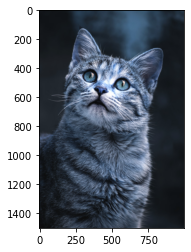

In [36]:
test_img2 = cv2.imread('/content/Cat.jpg')
plt.imshow(test_img2)

In [37]:
test_img2.shape

(1500, 1000, 3)

In [43]:
test_img2 = cv2.resize(test_img2, (256,256))

In [44]:
test_input2 = test_img2.reshape((1,256,256,3))

In [45]:
model.predict(test_input2)

1/1 [==============================] - 0s 31ms/step


array([[0.00062836]], dtype=float32)